<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/topics/ml%20algos/_07_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

In [ ]:
# Step 1: Create Dummy Data
# Set seed for reproducibility
np.random.seed(42)

# Generate dummy data with three distinct classes
n_samples = 1000

# Define class centers
centers = {
    0: (0, 0),
    1: (3, 3),
    2: (-3, 3)
}

# Create an empty list to hold the data
X = []
y = []

# Generate data for each class
for class_label, center in centers.items():
    # Generate data points around the center
    X_class = np.random.randn(n_samples // 3, 2) + center
    y_class = np.full((n_samples // 3,), class_label)
    X.append(X_class)
    y.append(y_class)

# Combine the data into a single array
X = np.vstack(X)
y = np.concatenate(y)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Show the first few rows of the shuffled DataFrame
df.head()

,Feature 1,Feature 2,Target
0,1.640144,3.746254,1
1,-2.823558,2.632972,2
2,1.179297,0.067518,0
3,0.481009,0.223884,0
4,-2.277619,2.627167,2


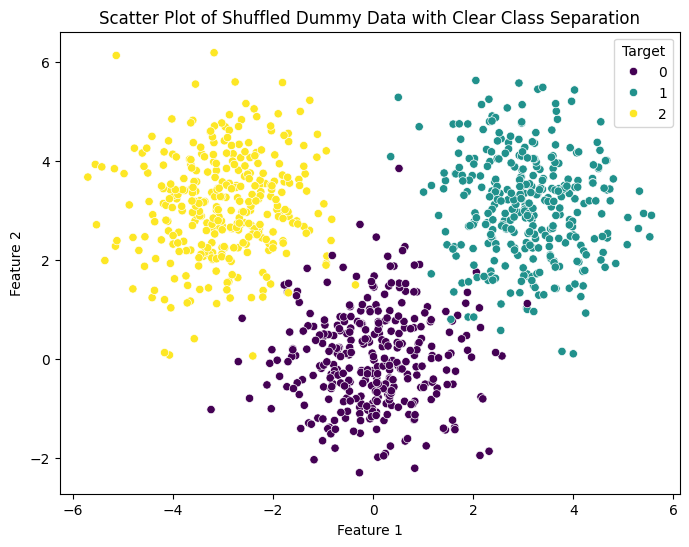

In [ ]:
# Step 2: Visualize the Data
# Scatter plot of the dummy data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Target', data=df, palette='viridis')
plt.title('Scatter Plot of Shuffled Dummy Data with Clear Class Separation')
plt.show()

In [ ]:
# Step 3: Split the Data
# Define features and target variable
X = df[['Feature 1', 'Feature 2']]
y = df['Target']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 4: Train the Decision Tree Model
# Initialize and train the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Step 5: Evaluate the Model
# Predict on the test set
y_pred = tree_model.predict(X_test)

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Decision Tree Classification Report:\n", report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       115
           1       0.97      0.97      0.97       103
           2       0.94      1.00      0.97        82

    accuracy                           0.96       300
   macro avg       0.96      0.97      0.96       300
weighted avg       0.96      0.96      0.96       300



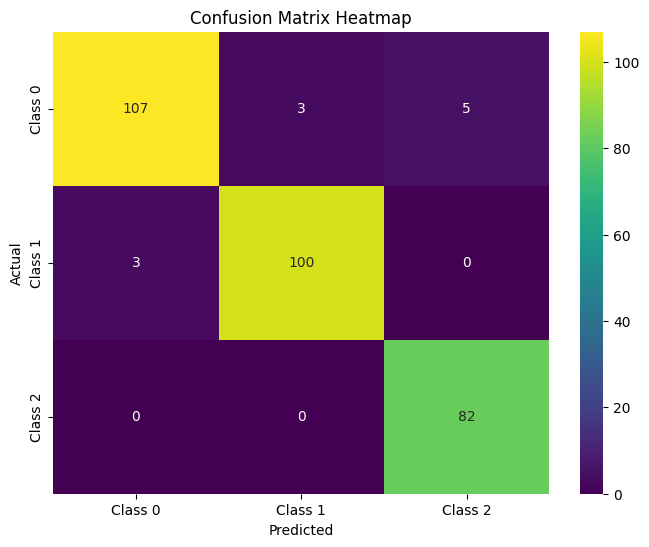

In [ ]:
# Step 6: Plot Heatmap for Confusion Matrix
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

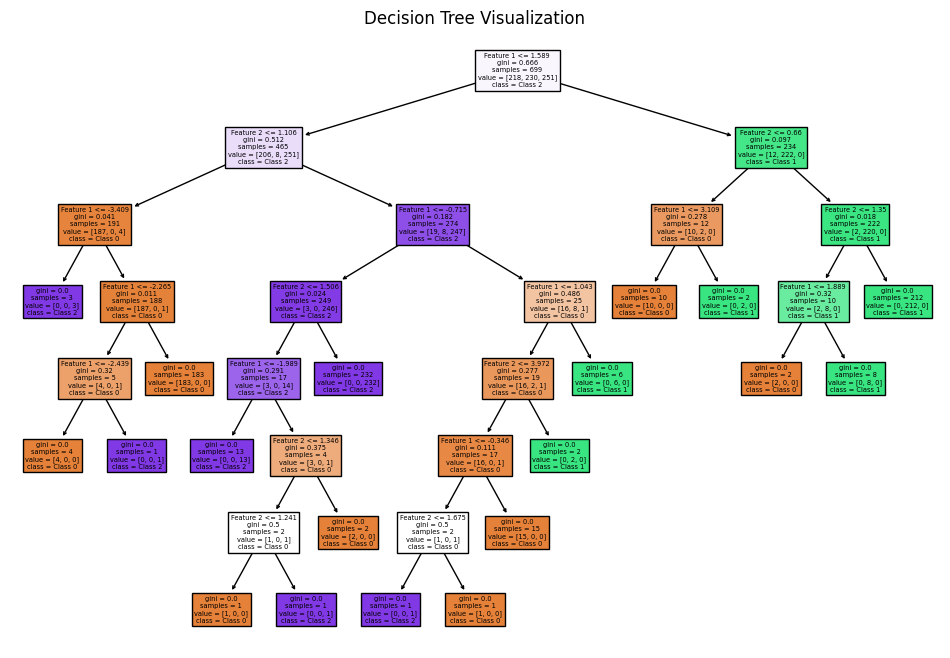

In [ ]:
# Step 7: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1', 'Class 2'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
# Step 8: Predict New Data
# New data point
new_data = np.array([[1.601, 0.812]])

# Predict the class for the new data point
prediction = tree_model.predict(new_data)
prediction_prob = tree_model.predict_proba(new_data)

print(f"Decision Tree Prediction for new data point {new_data}: {prediction[0]}")
print(f"Prediction probabilities: {prediction_prob[0]}")

Decision Tree Prediction for new data point [[1.601 0.812]]: 0
Prediction probabilities: [1. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
